In [1]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import re

In [2]:
# melakukan load dari csv ke dalam bentuk pandas dataframe

# dataset_path = 'dataset/keparahan_2_train1_download.csv'
dataset_path = 'result/manual.csv'
df = pd.read_csv(dataset_path)

In [3]:
df

,USD,IDR,persen,inflasi,klasifikasi
0,0.0,0.0,0.0,0,rendah
1,0.0,0.0,1.0,0,rendah
2,0.0,2500000.0,0.0,0,rendah
3,0.0,100.0,60.0,0,parah
4,0.0,0.0,0.0,0,rendah
...,...,...,...,...,...
2353,0.0,0.0,0.0,0,rendah
2354,0.0,0.0,0.0,0,rendah
2355,0.0,0.0,0.0,0,rendah
2356,0.0,0.0,6.2,0,sedang


In [4]:
# melihat tipe dari tiap kolom di dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358 entries, 0 to 2357
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   USD          2358 non-null   float64
 1   IDR          2358 non-null   float64
 2   persen       2358 non-null   float64
 3   inflasi      2358 non-null   int64  
 4   klasifikasi  2358 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 92.2+ KB


In [5]:
# melihat persebaran data dari setiap kolom, seperti variance dan std
df.describe()

,USD,IDR,persen,inflasi
count,2.358000e+03,2.358000e+03,2358.000000,2358.000000
mean,1.662214e+10,1.172499e+13,31.399338,0.120441
std,3.256672e+11,1.142766e+14,591.880048,0.325546
min,0.000000e+00,0.000000e+00,-8.700000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,0.000000e+00,1.000000e+01,5.485000,0.000000
max,1.113000e+13,3.281700e+15,20231.000000,1.000000


In [6]:
# melihat jumlah missing value
df.isna().sum()

USD            0
IDR            0
persen         0
inflasi        0
klasifikasi    0
dtype: int64

In [7]:
# melihat data yang memiliki missing value
df[df.isna().any(axis=1)]

,USD,IDR,persen,inflasi,klasifikasi


In [8]:
# Data Cleansing
df['USD'] = [re.sub("[^0-9]", "", str(USD)) if (re.sub("[^0-9]", "", str(USD)) != '') else 1 for USD in df['USD']]
df['USD'] = df['USD'].astype('int64')

df['IDR'] = [re.sub("[^0-9]", "", str(IDR)) if (re.sub("[^0-9]", "", str(IDR)) != '') else 1 for IDR in df['IDR']]
df['IDR'] = df['IDR'].astype('int64')

# df['persen'] = [re.sub("[^0-9]", "", str(persen)) if (re.sub("[^0-9]", "", str(persen)) != '') else 1 for persen in df['persen']]
# df['persen'] = df['persen'].astype('int64')

df['inflasi'] = [re.sub("[^0-9]", "", str(inflasi)) if (re.sub("[^0-9]", "", str(inflasi)) != '') else 1 for inflasi in df['inflasi']]
df['inflasi'] = df['inflasi'].astype('int64')
# df_rest = df_rest.replace({',': '.'}, regex=True)

df.head()

,USD,IDR,persen,inflasi,klasifikasi
0,0,0,0.0,0,rendah
1,0,0,1.0,0,rendah
2,0,25000000,0.0,0,rendah
3,0,1000,60.0,0,parah
4,0,0,0.0,0,rendah


In [9]:
keparahanValues=[]
for i in range (0,len(df)):
    keparahan=df.iloc[i,4]
    # print(keparahan)
    keparahanValues.append(keparahan)
# print(keparahanValues)


In [10]:
df['keparahan'] = keparahanValues
df.head()

,USD,IDR,persen,inflasi,klasifikasi,keparahan
0,0,0,0.0,0,rendah,rendah
1,0,0,1.0,0,rendah,rendah
2,0,25000000,0.0,0,rendah,rendah
3,0,1000,60.0,0,parah,parah
4,0,0,0.0,0,rendah,rendah


In [11]:
# melihat jumlah setiap kelas di kolom target
df.keparahan.value_counts()

rendah    1371
parah      878
sedang     109
Name: keparahan, dtype: int64

In [12]:
# labels=['Iris-virginica','Iris-versicolor', 'Iris-setosa ']
labels=['rendah','sedang', 'parah']

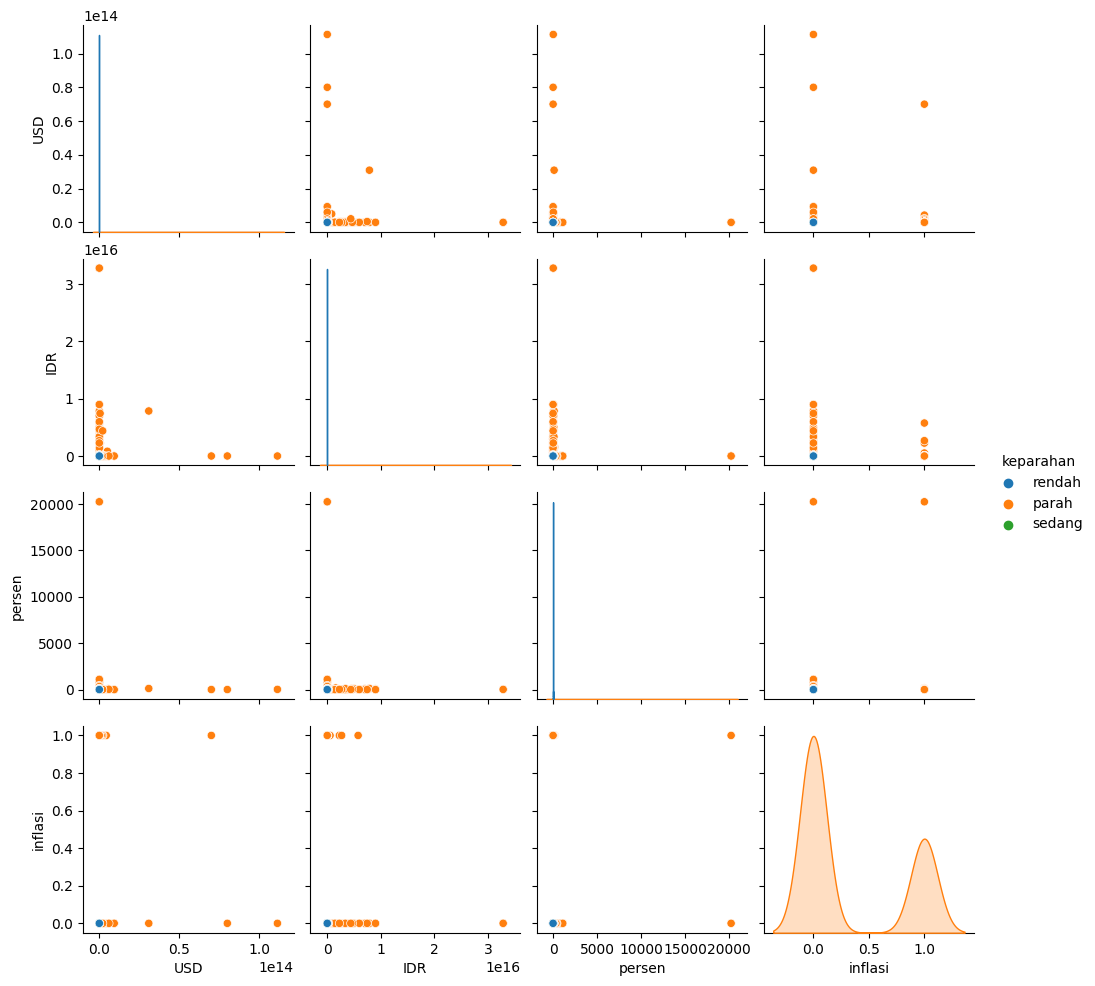

In [13]:
# distribusi data dari satu kolom ke kolom yang lain
# sns.pairplot(df,hue="Species")
sns.pairplot(df,hue="keparahan")

In [14]:
df.mean()


C:\Users\RayRoyy\AppData\Local\Temp\ipykernel_14152\972437606.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


USD        1.662214e+11
IDR        1.172499e+14
persen     3.139934e+01
inflasi    1.204411e-01
dtype: float64

In [15]:
df.fillna(df.mean(),inplace=True)

C:\Users\RayRoyy\AppData\Local\Temp\ipykernel_14152\2085774198.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(),inplace=True)


In [16]:
df.isna().sum()


USD            0
IDR            0
persen         0
inflasi        0
klasifikasi    0
keparahan      0
dtype: int64

In [17]:
# label encoder
# dictionary buat mappingnya
dic = {"rendah":1, "sedang":2,'parah':3}

# dimapping ke kolom baru 
df['Target']=df.keparahan.replace(dic)

In [18]:
df.head(5)

,USD,IDR,persen,inflasi,klasifikasi,keparahan,Target
0,0,0,0.0,0,rendah,rendah,1
1,0,0,1.0,0,rendah,rendah,1
2,0,25000000,0.0,0,rendah,rendah,1
3,0,1000,60.0,0,parah,parah,3
4,0,0,0.0,0,rendah,rendah,1


In [19]:
df = df.drop(df.columns[5], axis=1)
df.head(5)

,USD,IDR,persen,inflasi,klasifikasi,Target
0,0,0,0.0,0,rendah,1
1,0,0,1.0,0,rendah,1
2,0,25000000,0.0,0,rendah,1
3,0,1000,60.0,0,parah,3
4,0,0,0.0,0,rendah,1


In [20]:
# X adalah kolom attribut tanpa kolom target
X=df.iloc[:,0:-2]
X.head(2)

,USD,IDR,persen,inflasi
0,0,0,0.0,0
1,0,0,1.0,0


In [21]:
# y adalah kolom yang hanya target
y=df.iloc[:,-1]
y.head(2)

0    1
1    1
Name: Target, dtype: int64

In [22]:
# untuk memisahkan data train dan test -> https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# param stratify : data displit secara stratified -> https://scikit-learn.org/stable/modules/cross_validation.html#stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77,stratify=y) 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [23]:
# Check the shape of X_train and X_test
X_train.shape, X_test.shape

((1886, 4), (472, 4))

In [24]:
# untuk mengatasi perbedaan nilai antar kolom -> https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #tanpa target
X_test_scaled = scaler.transform(X_test)

In [25]:
# function untuk melakukan perhitungan seluruh metric evaluasi -> https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
def get_metrics(true_labels, predicted_labels):
    acc=np.round(accuracy_score(true_labels, predicted_labels),4)
    prec=np.round(precision_score(true_labels, predicted_labels,average='weighted'),4)
    recall=np.round(recall_score(true_labels, predicted_labels,average='weighted'),4)
    f1=np.round(f1_score(true_labels, predicted_labels,average='weighted'),4)
    return [acc,prec,recall,f1]

In [26]:
kolom=['Model','Acc','Precision','Recall','F1']
HASIL_AKHIR=pd.DataFrame(columns=kolom)

In [27]:
# fit model KNN -> https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() # default nilai k = 5 , leaf_size 30
# knn = KNeighborsClassifier(metric='minkowski') # default nilai k = 5 , leaf_size 30
# knn_balltree = KNeighborsClassifier(algorithm='ball_tree') 
# knn_kdtree = KNeighborsClassifier(algorithm='kd_tree') 
# knn_brute = KNeighborsClassifier(algorithm='brute') 




knn.fit(X_train, y_train)
# knn_balltree.fit(X_train, y_train)
# knn_kdtree.fit(X_train, y_train)
# knn_brute.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
# predict model ke data test
y_pred_knn=knn.predict(X_test)
# y_pred_knn=knn_balltree.predict(X_test)
# y_pred_knn=knn_kdtree.predict(X_test)
# y_pred_knn=knn_brute.predict(X_test)
y_pred_knn

array([1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 3, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 3,
       3, 3, 1, 1, 3, 2, 3, 1, 2, 1, 1, 1, 1, 2, 3, 1, 3, 3, 3, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 3, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 3, 1, 1, 1, 3, 2, 3, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1,
       1, 1, 1, 3, 3, 3, 1, 1, 1, 2, 3, 3, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1,
       1, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1,
       1, 1, 3, 3, 1, 1, 3, 3, 2, 3, 1, 1, 3, 3, 3, 3, 2, 1, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1,
       1, 1, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 3,
       1, 3, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 3, 1, 1, 3, 3,
       3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1,

In [29]:
print(knn.score(X_test,y_test))

0.9449152542372882


In [30]:
# Check accuracy score
print('Model accuracy score : {0:0.4f}'.format(accuracy_score(y_test, y_pred_knn)))

Model accuracy score : 0.9384


In [31]:
# evaluation score untuk model KNN
get_metrics(y_test,y_pred_knn)

[0.9384, 0.9368, 0.9384, 0.9374]

In [32]:
y_pred_train = knn.predict(X_train)
y_pred_train

array([1, 3, 3, ..., 1, 1, 3], dtype=int64)

In [33]:
# Print the scores on training and test set
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9652
Test set score: 0.9384


In [34]:
# Check class distribution in test set
print("y_test: Class")
y_test.value_counts()

y_test: Class


1    289
3    192
2     22
Name: Target, dtype: int64

In [35]:
print("y_train: Class")
y_train.value_counts()

y_train: Class


1    1157
3     767
2      88
Name: Target, dtype: int64

In [36]:
hasil=['knn']+get_metrics(y_test,y_pred_knn)
hasil

['knn', 0.9384, 0.9368, 0.9384, 0.9374]

In [37]:
# concat ke dataframe perbandingan score
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])  
HASIL_AKHIR

,Model,Acc,Precision,Recall,F1
0,knn,0.9384,0.9368,0.9384,0.9374


In [38]:
# fit model SVM -> https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [39]:
# predict model ke data test
y_pred_svm=clf.predict(X_test)

In [40]:
# evaluation score untuk model SVM
get_metrics(y_test,y_pred_svm)

c:\Python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.6223, 0.7284, 0.6223, 0.5172]

In [41]:
hasil=['svm']+get_metrics(y_test,y_pred_svm)

c:\Python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
# concat ke dataframe perbandingan score
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

In [43]:
# fit model Random Forest -> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
# predict model ke data test
y_pred_rf=rf.predict(X_test)

In [45]:
# evaluation score untuk model Random Forest
get_metrics(y_test,y_pred_rf)

[0.998, 0.998, 0.998, 0.998]

In [46]:
hasil=['RF']+get_metrics(y_test,y_pred_rf)

In [47]:
# concat ke dataframe perbandingan score
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

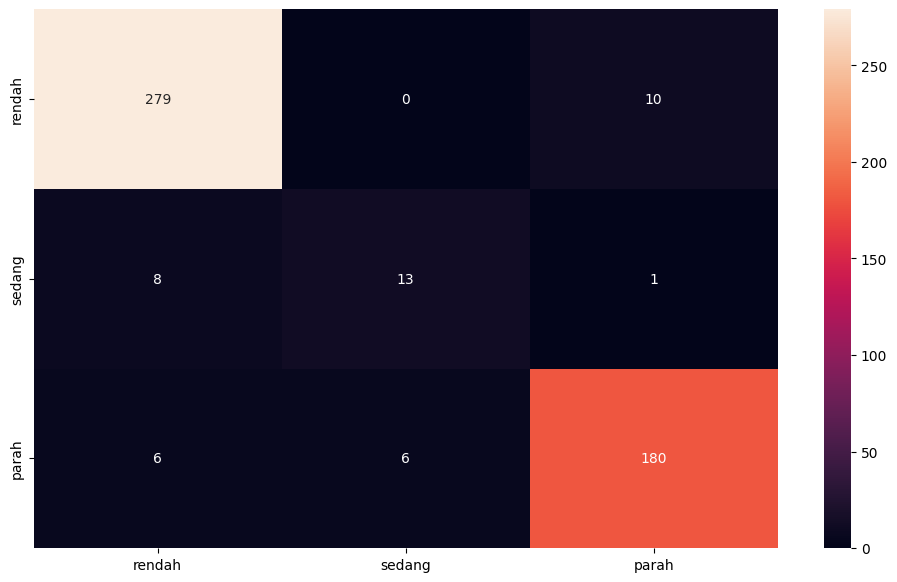

In [48]:
# Confusion Matrix dari model knn sebelumnya
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
conf = confusion_matrix(y_test,y_pred_knn)
cm = pd.DataFrame(
    conf, index = [i for i in labels],
    columns = [i for i in labels]
)
plt.figure(figsize = (12,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

In [49]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           1       0.95      0.97      0.96       289
           2       0.68      0.59      0.63        22
           3       0.94      0.94      0.94       192

    accuracy                           0.94       503
   macro avg       0.86      0.83      0.84       503
weighted avg       0.94      0.94      0.94       503

